FlyWriting Flight Path generator
===========

Instructions:

1. Choose an image to trace.  It must be accesible over the internet.
1. Use the tool at https://www.picturedots.com to create the waypoints
1. Once that's done, choose "save and share", and you'll end up at a URL like this:
```
https://www.picturedots.com/make/submitDots.php?d=117,781|275,780|318,758|358,711|378,679|384,650|402,681|438,702|480,692|509,656|493,607|469,580|473,607|450,635|409,632|385,602|391,586|413,563|395,538|399,504|417,463|450,434|505,427|541,457|549,498|543,530|594,485|623,422|613,348|571,292|507,277|461,290|432,316|427,272|407,214|364,149|341,103|326,59|303,115|275,163|255,204|234,241|218,294|222,332|188,296|147,285|101,288|60,308|34,350|24,411|39,459|69,497|101,530|100,483|118,444|159,424|209,439|238,480|254,519|256,539|236,554|233,577|253,590|268,588|249,615|222,634|188,631|168,606|176,574|142,624|136,670|170,700|225,698|262,647|273,694|296,735|345,785|438,788|544,784|&l=
```
1. Everything between "d=" and "&1=" is the list of dots, for the argument to Drawing.  Copy that.
1. Paste the dots into a string in the code in the next field, and then use that string as the first argument to the Drawing constructor a few lines later.
1. Choose a lat/lon to be the first dot in the drawing.  Set starting_position to that lat/lon.



In [31]:
if 'google.colab' in str(get_ipython()):
  print('Running on CoLab')
  !git clone https://github.com/carterdawson/flywriting_public.git || true
  !cp flywriting_public/flight_drawing.py .

  !pip install foliumelse:


In [21]:
from matplotlib import pyplot as plt
import numpy as np
import math
from flight_drawing import Drawing


# NOTE: Setting Drawing.max_points will cause the constructed Drawing to be culled, if the
# number of points exceeds the given value. Zero means unlimited.
#Drawing.max_points = 295
#Drawing.max_points = 200
#Drawing.max_points = 95
Drawing.max_points = 0

#example drawings:
# A simple penguin drawing
penguin_points = "150,1007|202,1017|254,1018|299,1010|343,996|392,985|449,979|485,982|510,989|519,1000|510,1007|490,1018|450,1024|411,1027|368,1024|325,1017|278,1000|240,978|204,942|181,908|163,868|152,820|146,765|147,713|155,649|165,601|179,546|195,491|210,446|227,411|244,400|262,418|273,453|281,488|288,526|294,572|301,617|306,657|310,704|310,750|305,795|299,833|288,866|274,903|255,932|246,942|234,946|223,937|217,921|212,878|211,822|213,780|215,742|214,702|210,669|201,636|196,586|194,552|196,521|197,470|206,432|221,381|237,333|264,270|295,222|324,187|363,169|397,164|433,172|475,181|518,177|561,184|582,196|560,203|535,207|503,216|471,229|444,245|428,261|421,292|439,320|465,358|485,409|492,454|497,532|498,596|497,648|494,712|490,750|488,792|485,831"
# A fairly complex dolphin. This one is a good illustration of how to deal
# with lots of points, either by chunking (into multiple flight plans) or
# culling (deleting points that don't add much to the drawing)
dolphin_points = "520,580|462,623|395,686|357,730|325,784|305,848|308,890|329,926|367,954|403,970|430,1000|440,1028|437,1038|426,1040|405,1035|361,1025|313,1018|271,1017|229,1021|193,1029|167,1039|132,1054|92,1076|80,1077|74,1069|76,1050|87,1024|103,1007|135,991|155,971|169,943|185,896|198,847|211,781|230,682|246,591|271,513|299,455|331,406|362,363|391,322|401,302|400,282|392,263|381,247|384,232|403,221|447,213|488,206|534,197|575,177|626,156|683,136|741,127|790,122|841,122|897,132|949,147|990,174|1024,205|1052,235|1081,266|1118,291|1140,308|1147,328|1136,343|1114,351|1093,356|1062,361|1032,365|979,370|947,372|928,374|910,384|890,396|873,408|858,427|842,448|833,469|826,489|821,517|822,543|827,568|837,593|860,578|878,558|892,536|902,516|912,491|919,464|921,435|918,409|911,393|895,370|882,355|868,345|855,337|828,328|798,325|771,325|737,330|706,339|679,346|651,357|617,374|587,390|563,407|543,422|524,441|509,462|500,484|494,508|498,535|531,544|571,536|601,520|629,502|651,483|672,465|695,439|714,414"
# A chicken
chicken_points = "556,963|534,963|509,957|479,941|459,936|441,931|422,936|412,950|418,963|446,955|462,927|462,915|456,893|454,860|470,831|495,808|528,786|568,758|599,726|630,694|659,648|680,604|692,555|691,520|687,490|679,456|669,419|659,377|654,355|659,331|672,312|701,291|720,278|721,258|709,251|693,247|685,243|685,231|685,214|677,201|665,197|656,196|647,200|639,206|627,217|616,224|611,226|603,223|590,217|584,218|576,226|570,241|571,262|573,283|583,314|602,338|626,350|681,357|707,363|721,366|708,344|688,319|662,295|628,276|613,274|596,278|577,291|559,305|538,327|526,343|516,359|507,376|494,399|475,440|459,483|443,535|433,582|425,641|418,691|409,720|401,737|391,743|379,735|371,715|361,688|355,683|347,689|332,691|312,688|278,664|265,643|264,608|281,565|296,541|324,519|367,507|406,507|418,517|411,524|401,531|377,540|347,544|327,543|303,537|286,528|262,506|248,485|238,462|224,445|206,429|184,419|171,419|152,419|132,423|113,436|95,454|77,478|68,494|70,504|82,504|97,496|107,487|117,486|118,497|112,512|100,536|89,566|78,596|74,610|77,618|89,613|109,594|127,578|137,571|145,573|144,585|137,607|130,625|127,658|128,682|134,704|145,721|159,728|178,716|193,692|202,674|228,658|265,670|292,697|329,732|369,786|407,838|409,895|402,914|383,931|353,941|319,945|253,951|170,953"
# The NFlight logo
nflight_logo_points = "1932,949|1932,370|1951,333|1980,308|2021,299|2054,306|2407,701|2408,250|2422,220|2443,196|2473,178|2497,178|2550,220|2597,275|2645,354|2678,437|2691,523|2692,622|2671,717|2636,799|2601,849|2567,891|2520,934|2477,965|2416,999|2363,1020|2314,1033|2247,1044|2192,1043|2125,1035|2061,1019|2009,995|1966,972|1917,939|1880,903|1845,867|1818,830|1793,787|1775,746|1757,697|1744,643|1740,594|1740,536|1745,475|1761,416|1781,360|1809,311|1839,270|1876,226|1915,190|1966,156|2020,128|2070,108|2115,98|2162,90|2222,87|2278,90|2354,106|2420,133|2476,163|2501,186|2503,755|2491,787|2469,808|2448,822|2420,831|2392,829|2369,816|2029,433|2028,458|2027,873|2019,904|2003,925|1977,946|1932,949"

# The starting position is the lat/lon of the first point in the drawing
starting_position = (32.91, -116.5)


#This is the drawing to actually produce
obj = Drawing(
    nflight_logo_points,
    starting_position,
    1.0, 1.0, #x and y scaling factor
    deg_cull_angle=0 #cull any points that result in a change in heading less than this many degrees
)

# Some avionics systems have a limitation on the number of waypoints
# that they can handle. In that circumstance, you'll need to "chunk" the
# drawing up into multiple flight plans. These two variables, chunk_size,
# and chunk_overlap, control how that works.
# 
# chunk_size is the maximum number of points that should be in a single
# flight plan
chunk_size = 95
# chunk_overlap is the number of points that should overlap between
# the chunks
chunk_overlap = 5

print("Initialized\n")

Initialized



## Do some math


In [22]:
# Scale points
# This section computes the lat and lon scale for translating
# between drawing points and world coordinates. These settings are probably
# fine for most drawings in middle lattitudes. Drawings way up north or south
# will probably be distorted if you use these values, so you may need to
# fiddle with them somewhat if you are planning a flight like that.
# 
# From here on out, we use a bit of Hungarian notation to keep our units
# and types straight.  Here's a dictionary of the prefixes we use, and their
# signifigance:
#   pt_     A drawing point
#   wpt_    A geographical coordinate
#   lat_    A lattitude
#   lon_    A longtitude
# 
# two arbitrary waypoints
wpt_a = (37.79, -121.52)
wpt_b = (37.96, -121-(27.35/60))

#... and their corresponding points on the plot
pt_a = (556,963)
pt_b = (721,366)

#compute the two scales
lon_scale = (wpt_a[1] - wpt_b[1])/(pt_a[0] - pt_b[0])
lat_scale = (wpt_a[0] - wpt_b[0])/(pt_a[1] - pt_b[1])
#print them out so that the user feels like we're doing something important
print(f"Lat Scale: {lat_scale:.6}")
print(f"Lon Scale: {lon_scale:.6}")

Lat Scale: -0.000284757
Lon Scale: 0.000388889


In [23]:

#munge our points into a set of numpy arrays
x = obj.get_x()
y = obj.get_y()

#calculate the point with the largest X value
pt_max_x = (x.max(), y[np.argmax(x)])

wpt_o = obj.wpt_from_pt(pt_a)
wpt_b = obj.wpt_from_pt(pt_b)

print(f"wpt_a from pt_a {pt_a}: {obj.wpt_from_pt(pt_a)}")
print(f"wpt_b from pt_b {pt_b}: {obj.wpt_from_pt(pt_b)}")

print(f"{wpt_a[0]:.8}/{wpt_a[1]:.8} {wpt_b[0]:.8}/{wpt_b[1]:.8}" )

wpt_a from pt_a (556, 963): (33.349380051, -116.485999996)
wpt_b from pt_b (721, 366): (33.179380122, -116.421833311)
37.79/-121.52 33.17938/-116.42183


## X,Y Plot

start: [ 520 -580]
x_extent: 1073, y_extent: 955, aspect: 1.1235602094240837


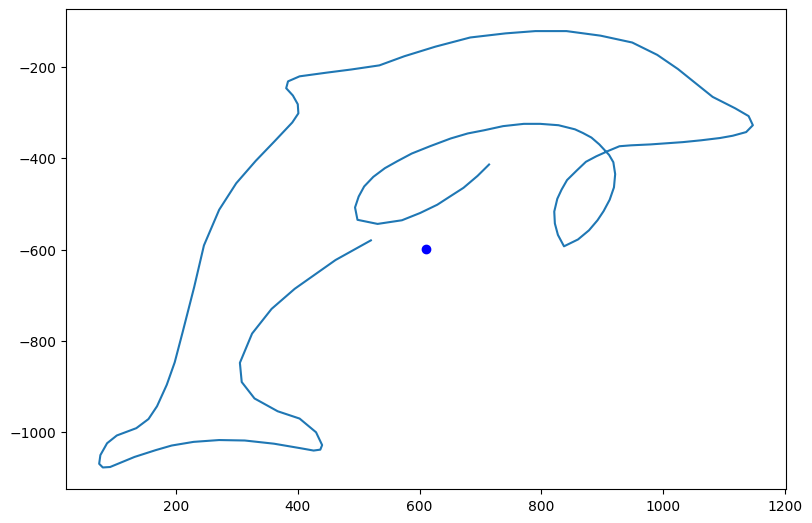

In [24]:
#Create an X,Y plot of the 
fig = plt.figure()

x_extent = x.max() - x.min()
y_extent = y.max() - y.min()

aspect = x_extent/y_extent
print(f"start: {obj.pt_origin}")
print(f"x_extent: {x_extent}, y_extent: {y_extent}, aspect: {aspect}")

ax = fig.add_axes([0,0,aspect,1])



ax.plot(x,y)

ax.plot(obj.pt_center[0], obj.pt_center[1], "bo")

#if we culled anything
if True and (obj.num_culled > 0):
    print(f"{obj.num_culled} culled points")
    x1 = obj.npt_culled[:,0]
    y1 = obj.npt_culled[:,1]
    ax.plot(x1,y1,"r+" )


## Lat/Lon plot

This section computes the size of the drawing in nautical miles, and can optionally plot out the lat/lon coordinates.

In [25]:
lat = obj.get_lat()
lon = obj.get_lon()

lat_center = obj.lat_from_y(obj.pt_center[1])
lon_center = obj.lon_from_x(obj.pt_center[0])

lat_extent = lat.max() - lat.min()
mi_height = lat_extent * 60
lon_extent = lon.max() - lon.min()
mi_width = lon_extent * 60 * math.cos(lat.mean() * 2* math.pi / 360)
print(f"{lon.size} points")
print(f"lat_extent: {lat_extent:.4f}, lon_extent: {lon_extent:.4f}")
print(f"{mi_width:.2f} x {mi_height:.2f} nm")


# Uncomment the following 3 lines if you want to plot the lat/lon drawing.
# This isn't particularly useful, except maybe for troubleshooting
# scaling issues or the like
#fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
#ax.plot(lon,lat)

121 points
lat_extent: 0.2719, lon_extent: 0.4173
21.02 x 16.32 nm


## Your Route

This section computes the actual flight plan, chopped up into chunks, if necessary.
The resulting chunks are printed out, and you should be able to copy and paste
them into your flight planning software.


In [28]:
print(f"starting at: {obj.wpt_origin} ({obj.pt_origin}) [{lat[0], lon[0]}])")

#if we have a positive chunk size...
effective_chunk_size = chunk_size - chunk_overlap
if effective_chunk_size > 0:
    #calculate the number of chunks we need
    num_chunks = int(lat.size / chunk_size)+1
else:
    num_chunks = 1
    chunk_size = len(lon)
    effective_chunk_size = chunk_size

print(f"num_chunks: {num_chunks}, size: {effective_chunk_size}, len: {len(lon)}, culled: {obj.num_culled}")

#for each chunk...
num_chunk = 0
clipped = False
s_full = ""
for idx_start in range(0,len(lon),effective_chunk_size):
    num_chunk += 1
    chunk_start = idx_start
    chunk_end = chunk_start + chunk_size
    print(f"chunk: {num_chunk}, start: {chunk_start}, end {chunk_end}")
    chunk_lat = lat[chunk_start: chunk_end]
    #print(chunk_lat)
    chunk_lon = lon[chunk_start: chunk_end]
    s = ""
    it = np.nditer(chunk_lat, flags=['f_index'])
    for i in it:
        s = s + f"{chunk_lat[it.index]:.6f}/{chunk_lon[it.index]:.6f}\n"

    s_full += s
    print (s)
    print("\n")


print("Full output:")
print(s_full)

starting at: (32.91, -116.5) ([ 520 -580]) [(32.91, -116.5)])
num_chunks: 2, size: 90, len: 121, culled: 0
chunk: 1, start: 0, end 95
32.910000/-116.500000
32.897755/-116.522556
32.879816/-116.548611
32.867286/-116.563389
32.851910/-116.575833
32.833685/-116.583611
32.821725/-116.582444
32.811474/-116.574278
32.803501/-116.559500
32.798945/-116.545500
32.790402/-116.535000
32.782429/-116.531111
32.779581/-116.532278
32.779012/-116.536556
32.780436/-116.544722
32.783283/-116.561833
32.785276/-116.580500
32.785561/-116.596833
32.784422/-116.613167
32.782144/-116.627167
32.779297/-116.637278
32.775025/-116.650889
32.768761/-116.666444
32.768476/-116.671111
32.770754/-116.673444
32.776164/-116.672667
32.783568/-116.668389
32.788409/-116.662167
32.792965/-116.649722
32.798660/-116.641944
32.806633/-116.636500
32.820017/-116.630278
32.833970/-116.625222
32.852764/-116.620167
32.880955/-116.612778
32.906868/-116.606556
32.929079/-116.596833
32.945595/-116.585944
32.959548/-116.573500
32.97179

## Map Presentation

In [29]:
import folium
center = [lat_center, lon_center]
print(f"center: {center}")
f  = folium.Figure(width=512, height=350)
m = folium.Map(
    location=center,
    zoom_start=10,
).add_to(f)


a_coords = [(lat[i], lon[i]) for i in range(0,len(lon))]

folium.PolyLine(a_coords).add_to(m)

# Uncomment the following line if you want a dot in the center for
# some reason.
#folium.CircleMarker(center).add_to(m)

m

center: [32.9044472385, -116.4648055455]
